# Estrategia de Promedio Movil de 40

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from yahoofinancials import YahooFinancials
from datetime import date, timedelta
from scipy.signal import argrelextrema
from statsmodels.nonparametric.kernel_regression import KernelReg
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy import stats

In [3]:
ini = date.today() - timedelta(days=1460) # 4 years ago
ini2 = date.today() - timedelta(days=728) # 2 years ago
today = date.today()
ini_str = str(ini)
ini2_str = str(ini2)
today_str = str(today)
print(ini_str)
print(ini2_str)
print(today_str)
tickers = [
'TSLA',
'SPY'
]

2020-12-18
2022-12-20
2024-12-17


In [21]:
yahoo_financials = YahooFinancials (tickers)
historical_stock_prices = yahoo_financials.get_historical_price_data(ini_str, today_str, 'daily')

In [23]:
historical_stock_prices

{'TSLA': {'eventsData': {'splits': {'2022-08-25': {'date': 1661434200,
     'numerator': 3.0,
     'denominator': 1.0,
     'splitRatio': '3:1',
     'formatted_date': '2022-08-25'}}},
  'firstTradeDate': {'formatted_date': '2010-06-29', 'date': 1277818200},
  'currency': 'USD',
  'instrumentType': 'EQUITY',
  'timeZone': {'gmtOffset': -18000},
  'prices': [{'date': 1608301800,
    'high': 231.6666717529297,
    'low': 209.51333618164062,
    'open': 222.96665954589844,
    'close': 231.6666717529297,
    'volume': 666378600,
    'adjclose': 231.6666717529297,
    'formatted_date': '2020-12-18'},
   {'date': 1608561000,
    'high': 222.8333282470703,
    'low': 215.35667419433594,
    'open': 222.0800018310547,
    'close': 216.6199951171875,
    'volume': 174135900,
    'adjclose': 216.6199951171875,
    'formatted_date': '2020-12-21'},
   {'date': 1608647400,
    'high': 216.6266632080078,
    'low': 204.7433319091797,
    'open': 216.0,
    'close': 213.44667053222656,
    'volume':

In [39]:
index = 1
df_d = pd.DataFrame()
for ticker in tickers:
    index+=1
    tupla = pd.DataFrame(historical_stock_prices[ticker]['prices'])
    tupla['companyName']=ticker
    tupla['SMA20'] = tupla['close'].rolling(20).mean()
    tupla.dropna(inplace=False)
    tupla['SMA40'] = tupla['close'].rolling(40).mean()
    tupla.dropna(inplace=False)
    tupla['SMA100'] = tupla['close'].rolling(100).mean()
    tupla.dropna(inplace=False)
    tupla['SMA200'] = tupla['close'].rolling(200).mean()
    tupla.dropna(inplace=False)
    if index==1:
        df_d = tupla
    else:
        df_d = pd.concat([df_d, tupla], ignore_index=True)
df_d = df_d.drop('date',axis=1)
df_d.rename(columns={"formatted_date": "date"}, inplace = True)
df_d['date']=pd.to_datetime(df_d['date'])

In [49]:
tupla.tail(10)

,date,high,low,open,close,volume,adjclose,formatted_date,companyName,SMA20,SMA40,SMA100,SMA200
994,1733236200,604.159973,602.340027,603.390015,603.909973,26906600,603.909973,2024-12-03,SPY,594.936002,586.835002,567.174799,545.157749
995,1733322600,607.909973,604.950012,605.630005,607.659973,42787600,607.659973,2024-12-04,SPY,596.484000,587.697252,567.636099,545.712249
996,1733409000,608.479980,606.299988,607.659973,606.659973,28762200,606.659973,2024-12-05,SPY,597.264999,588.435251,568.054099,546.259499
997,1733495400,609.070007,607.020020,607.440002,607.809998,31241500,607.809998,2024-12-06,SPY,597.875000,589.227251,568.562798,546.761049
998,1733754600,607.859985,604.080017,607.690002,604.679993,34742700,604.679993,2024-12-09,SPY,598.199500,589.854750,569.082999,547.245199
999,1733841000,605.799988,602.130005,605.369995,602.799988,37234500,602.799988,2024-12-10,SPY,598.401498,590.316750,569.621099,547.729249
1000,1733927400,608.429993,605.500000,605.780029,607.460022,28677700,607.460022,2024-12-11,SPY,598.929498,591.008749,570.149199,548.231899
1001,1734013800,607.159973,604.330017,606.580017,604.330017,31543800,604.330017,2024-12-12,SPY,599.286499,591.559500,570.654698,548.722249
1002,1734100200,607.130005,602.809998,606.400024,604.210022,35904700,604.210022,2024-12-13,SPY,599.829501,592.106001,571.284499,549.202899
1003,1734359400,607.780029,605.210022,606.000000,606.789978,43656700,606.789978,2024-12-16,SPY,600.881500,592.661000,571.968299,549.672599


In [53]:
##descarga de dataframe HORA
df_h = pd.DataFrame()
for ticker in tickers:
    company = yf.download(ticker, start = ini2_str, end = today_str, interval='60m')
    ##company = pd.read_csv("https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol="+ticker+"&interval=60min&month=2024-09&outputsize=full&datatype=csv&apikey=NC6PCMYOFPL8LYVC")
    ##company = pd.read_csv("https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=ticker&interval=daily&month=2023-10&outputsize=full&apikey=NC6PCMYOFPL8LYVC&datatype=csv")
    ## cambio de nombre de las columnas
    ##print (company)
    company.rename(columns={'Datetime':'datetime','Open':'open','High':'high','Low':'low','Close':'close','Adj Close':'adj close','Volume':'volume'}, inplace = True)
    
    company['date'] = pd.to_datetime (company.index.date)
    company['datetime'] = pd.to_datetime (company.index)    
    company['companyName'] = ticker
    company['SMA20'] = company['close'].rolling(20).mean()
    company.dropna(inplace=False)
    company['SMA40'] = company['close'].rolling(40).mean()
    company.dropna(inplace=False)
    company['SMA100'] = company['close'].rolling(100).mean()
    company.dropna(inplace=False)
    company['SMA200'] = company['close'].rolling(200).mean()
    company.dropna(inplace=False)
    
    df_h = pd.concat([df_h, company],ignore_index=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [57]:
df_h.tail(50)

,open,high,low,close,adj close,volume,date,datetime,companyName,SMA20,SMA40,SMA100,SMA200
6918,606.750000,607.385010,606.304993,606.609985,606.609985,7907075,2024-12-05,2024-12-05 15:30:00,SPY,605.889737,603.585844,596.596849,590.907686
6919,607.440002,609.070007,607.340027,608.880005,608.880005,5053995,2024-12-06,2024-12-06 09:30:00,SPY,606.162738,603.798557,596.721049,591.056186
6920,608.880005,608.976990,607.559998,608.000000,608.000000,4270210,2024-12-06,2024-12-06 10:30:00,SPY,606.412488,603.980307,596.852750,591.175311
6921,607.989990,608.289978,607.320007,607.699890,607.699890,2667723,2024-12-06,2024-12-06 11:30:00,SPY,606.618982,604.189055,596.978350,591.301311
6922,607.700012,608.390015,607.159973,608.065002,608.065002,1752852,2024-12-06,2024-12-06 12:30:00,SPY,606.841238,604.429182,597.107500,591.428136
6923,608.065002,608.066284,607.030029,607.125000,607.125000,2813995,2024-12-06,2024-12-06 13:30:00,SPY,607.000238,604.651808,597.237350,591.561511
6924,607.130005,607.749878,607.020020,607.614990,607.614990,3577317,2024-12-06,2024-12-06 14:30:00,SPY,607.188489,604.880238,597.379800,591.700435
6925,607.619995,608.119995,607.450012,607.890015,607.890015,4661615,2024-12-06,2024-12-06 15:30:00,SPY,607.301489,605.109738,597.590550,591.842336
6926,607.690002,607.859985,606.179993,606.377502,606.377502,4813215,2024-12-09,2024-12-09 09:30:00,SPY,607.303864,605.305426,597.781925,591.979148
6927,606.369873,606.640015,604.609985,605.784973,605.784973,5009899,2024-12-09,2024-12-09 10:30:00,SPY,607.275613,605.480301,597.985104,592.096023


In [59]:
## Funcion minimos y maximos por HORA

def find_extrema_h(s, col, bw='cv_ls'):
    """
    Input:
        s: prices as pd.series
        bw: bandwith as str or array like
    Returns:
        prices: with 0-based index as pd.series
        extrema: extrema of prices as pd.series
        smoothed_prices: smoothed prices using kernel regression as pd.series
        smoothed_extrema: extrema of smoothed_prices as pd.series
    """
    # Copy series so we can replace index and perform non-parametric
    # kernel regression.
    prices = s.copy()
    prices = prices.reset_index()
    
    #print(prices.head(5))
    prices.columns = ['index','datetime',col]
    
    #prices.columns = ['date', 'close', 'date2']
    horas = prices['datetime']
    prices = prices[col]    
    
    #prices = s.copy()
    #prices.columns = ['date', 'price']
    #prices = pd.DataFrame(s)
    #prices = prices['close']
    
    #print(type(prices))
    #print("===============")
    #print(prices)
    #print("===============")
    #print(prices.index)

    kr = KernelReg(
        [prices.values],
        [prices.index.to_numpy()],
        var_type='c', bw=bw
    )
    f = kr.fit([prices.index.values])

    # Use smoothed prices to determine local minima and maxima
    smooth_prices = pd.Series(data=f[0], index=prices.index)
    smooth_local_max = argrelextrema(smooth_prices.values, np.greater)[0]
    smooth_local_min = argrelextrema(smooth_prices.values, np.less)[0]
    local_max_min = np.sort(
        np.concatenate([smooth_local_max, smooth_local_min]))
    smooth_extrema = smooth_prices.loc[local_max_min]

    # Iterate over extrema arrays returning datetime of passed
    # prices array. Uses idxmax and idxmin to window for local extrema.
    price_local_max_dt = []
    for i in smooth_local_max:
        if (i > 1) and (i < len(prices)-1):
            price_local_max_dt.append(prices.iloc[i-2:i+2].idxmax())

    price_local_min_dt = []
    for i in smooth_local_min:
        if (i > 1) and (i < len(prices)-1):
            price_local_min_dt.append(prices.iloc[i-2:i+2].idxmin())

    maxima = pd.Series(prices.loc[price_local_max_dt])
    minima = pd.Series(prices.loc[price_local_min_dt])
    extrema = pd.concat([maxima, minima]).sort_index()
  

    # Return series for each with bar as index
    return extrema, prices, smooth_extrema, smooth_prices, maxima, minima, horas

In [81]:
# Determinar puntos minimos por HORA
df_h2 = df_h
index = 1
df_min = pd.DataFrame()
df_max = pd.DataFrame()
for ticker in tickers:
    print(ticker)
    print(index)
    index+=1
    tuplas = df_h2.query("companyName==@ticker")
    #col1 = 'close'
    
    colmin='low'
    tuplas2 = tuplas[['datetime',colmin]]   
    extrema, prices, smooth_extrema, smooth_prices, maxima, minima, horas = find_extrema_h(tuplas2, colmin, bw=[1.5])
    
    minima2 = minima.to_frame()
    minima2 = minima2.drop_duplicates()
    minima2.rename(columns={"low": "trendlower"}, inplace = True)
    minima2['companyName']=ticker    
    #minima2 = minima2.reset_index()
    minima2 = pd.concat([minima2, horas], join = 'outer', axis=1)
    
    colmax='high'
    tuplas3 = tuplas[['datetime',colmax]]
    extrema, prices, smooth_extrema, smooth_prices, maxima, minima, horas = find_extrema_h(tuplas3, colmax, bw=[1.5])

    maxima2 = maxima.to_frame()
    maxima2 = maxima2.drop_duplicates()
    maxima2.rename(columns={"high": "trendhigher"}, inplace = True)
    maxima2['companyName']=ticker
    #maxima2 = maxima2.reset_index()
    maxima2 = pd.concat([maxima2, horas], join = 'outer', axis=1)
    
    if index==1:        
        df_min = minima2
        df_max = maxima2
    else:
        df_min = pd.concat([df_min, minima2],ignore_index=True)
        df_max = pd.concat([df_max, maxima2],ignore_index=True)
    #del tuplas, tuplas2, extrema, prices, smooth_extrema, smooth_prices, maxima, minima, minima2, maxima2


#print(df_min.head(5))
#print(df_max.head(5))
df_h2 = pd.merge(df_h2, df_min[['datetime','companyName', 'trendlower']], on = ['companyName','datetime'], how='left')
df_h2 = pd.merge(df_h2, df_max[['datetime','companyName', 'trendhigher']], on = ['companyName','datetime'], how='left')

TSLA
1
SPY
2


In [83]:
#puntos de cambio de tendencia cuando close_min es mayor a cero
#punto de cambio a tendencia alcista
def pm01(df_h2):
    if ((df_h2['trendlower']>0) & ((df_h2['low']-df_h2['SMA40'])<=0.5)):
        return 1
    else:
        return 0
df_h2['pm40_01'] = df_h2.apply(pm01, axis=1)

In [85]:
#el PM20 sobre el PM40, el PM40 por encima del PM100 y este ultimo por encima del PM200
def pm02(df_h2):
    if ((df_h2['SMA20'] > df_h2['SMA40']) & (df_h2['SMA40'] > df_h2['SMA100']) & (df_h2['SMA100'] > df_h2['SMA200'])):
        return 1
    else:
        return 0
df_h2['ind_SMA'] = df_h2.apply(pm02, axis=1)

#numeracion de casos donde se dio el cambio de tendencia
df_h2['id_posiblepm40'] = df_h2.query("pm40_01==1 and ind_SMA==1").groupby(["companyName"]).cumcount()+1

In [87]:
df_h2.head(10)

,open,high,low,close,adj close,volume,date,datetime,companyName,SMA20,SMA40,SMA100,SMA200,trendlower,trendhigher,pm40_01,ind_SMA,id_posiblepm40
0,146.050003,148.470001,144.169998,145.860001,145.860001,40604538,2022-12-20,2022-12-20 09:30:00,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN
1,145.879898,147.000000,141.809998,142.245102,142.245102,27152737,2022-12-20,2022-12-20 10:30:00,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN
2,142.240005,143.190002,141.509995,141.860001,141.860001,18549206,2022-12-20,2022-12-20 11:30:00,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN
3,141.871506,142.229996,140.809998,141.770004,141.770004,15539317,2022-12-20,2022-12-20 12:30:00,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN
4,141.779999,142.239395,140.600006,140.990005,140.990005,14486628,2022-12-20,2022-12-20 13:30:00,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN
5,141.000000,141.240005,139.850006,140.354996,140.354996,16973910,2022-12-20,2022-12-20 14:30:00,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN
6,140.350006,140.440002,137.660004,137.830002,137.830002,19365592,2022-12-20,2022-12-20 15:30:00,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN
7,139.279999,141.259995,135.889999,138.089996,138.089996,51253068,2022-12-21,2022-12-21 09:30:00,TSLA,NaN,NaN,NaN,NaN,135.889999,NaN,0,0,NaN
8,138.110001,139.919998,137.589996,138.500000,138.500000,20120403,2022-12-21,2022-12-21 10:30:00,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN
9,138.490005,139.169998,136.380005,137.235001,137.235001,16080099,2022-12-21,2022-12-21 11:30:00,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN


In [ ]:
df_h2.query("companyName=='SPY' and date>='2024-06-28' and date<='2024-07-03'")

In [89]:
df_h2['id_posiblepm40'].drop_duplicates()

0        NaN
252      1.0
282      2.0
742      3.0
875      4.0
        ... 
6576    59.0
6595    60.0
6670    61.0
6694    62.0
6699    63.0
Name: id_posiblepm40, Length: 64, dtype: float64

In [91]:
#obtener 20 datos anteriores y despues, dataframe HORA
df_h3 = pd.DataFrame()

posiciones = 20 #horas que entran en evaluacion por caso
mitad = int(posiciones/2)

for i, row in df_h2.iterrows():    
    print("index:" ,i, "company:", df_h2['companyName'][i])    
    if (df_h2['pm40_01'][i]==1):
        print("index insertar:",i)
        tupla = df_h2.query("index==@i")
        #tupla = df_h2.loc[i]
        tupla = tupla.reset_index(drop=True)
        tupla['ind_posicion']=0 #punto central
        #id_posiblepm40 = tupla["id_posiblepm40"].max()
        #tupla = df_d2.loc[i]
        if len(df_h3)<1:
            df_h3 = tupla
        else:
            df_h3 = pd.concat([df_h3, tupla],ignore_index=True)

        id_posiblepm40 = df_h2.loc[i, 'id_posiblepm40']
        print ("id_posiblepm40:", id_posiblepm40)

        filas_posteriores1 = df_h2.iloc[i+1: i + (mitad + 1)]
        filas_posteriores1 = filas_posteriores1.reset_index(drop=True)
        filas_posteriores1['pm40_01']=0
        filas_posteriores1['id_posiblepm40']=id_posiblepm40
        filas_posteriores1['ind_posicion']=1 #primera parte mitad de registros posteriores

        filas_posteriores2 = df_h2.iloc[i+mitad+1: i + (posiciones+1)]
        filas_posteriores2 = filas_posteriores2.reset_index(drop=True)
        filas_posteriores2['pm40_01']=0
        filas_posteriores2['id_posiblepm40']=id_posiblepm40
        filas_posteriores2['ind_posicion']=2 #segunda parte mitad de registros posteriores

        filas_anteriores1 = df_h2.iloc[max(0, i - posiciones):i-mitad]
        filas_anteriores1 = filas_anteriores1.reset_index(drop=True)
        filas_anteriores1['pm40_01']=0
        filas_anteriores1['id_posiblepm40']=id_posiblepm40
        filas_anteriores1['ind_posicion']=-2 #primera mitad de registros anteriores

        filas_anteriores2 = df_h2.iloc[max(0, i - mitad):i]
        filas_anteriores2 = filas_anteriores2.reset_index(drop=True)
        filas_anteriores2['pm40_01']=0
        filas_anteriores2['id_posiblepm40']=id_posiblepm40
        filas_anteriores2['ind_posicion']=-1 #segunda mitad de registros anteriores

        df_h3 = pd.concat([df_h3, filas_anteriores2],ignore_index=True)
        df_h3 = pd.concat([df_h3, filas_anteriores1],ignore_index=True)
        df_h3 = pd.concat([df_h3, filas_posteriores1],ignore_index=True)
        df_h3 = pd.concat([df_h3, filas_posteriores2],ignore_index=True)

    # Obtener las 10 filas anteriores desde la posición actual
    #df_company = df_d2.query('companyName==@companyName')
    

index: 0 company: TSLA
index: 1 company: TSLA
index: 2 company: TSLA
index: 3 company: TSLA
index: 4 company: TSLA
index: 5 company: TSLA
index: 6 company: TSLA
index: 7 company: TSLA
index: 8 company: TSLA
index: 9 company: TSLA
index: 10 company: TSLA
index: 11 company: TSLA
index: 12 company: TSLA
index: 13 company: TSLA
index: 14 company: TSLA
index: 15 company: TSLA
index: 16 company: TSLA
index: 17 company: TSLA
index: 18 company: TSLA
index: 19 company: TSLA
index: 20 company: TSLA
index: 21 company: TSLA
index: 22 company: TSLA
index: 23 company: TSLA
index: 24 company: TSLA
index: 25 company: TSLA
index: 26 company: TSLA
index: 27 company: TSLA
index: 28 company: TSLA
index: 29 company: TSLA
index: 30 company: TSLA
index: 31 company: TSLA
index: 32 company: TSLA
index: 33 company: TSLA
index: 34 company: TSLA
index: 35 company: TSLA
index: 36 company: TSLA
index: 37 company: TSLA
index: 38 company: TSLA
index: 39 company: TSLA
index: 40 company: TSLA
index: 41 company: TSLA
in

In [95]:
#df_h3.query("id_posiblepm40==13 and companyName=='AAPL'").sort_values(by=['datetime'])
#df_h3.query("ind_SMA==1").sort_values(by=['datetime'])
#df_h3.query("id_posiblepm40==45 and companyName=='META'").sort_values(by=['datetime'])

#numeracion de casos donde se dio el cambio de tendencia
df_group_posicion = df_h3[['companyName','id_posiblepm40', 'ind_posicion','ind_SMA']].query("ind_SMA==1").groupby(['companyName', 'id_posiblepm40','ind_posicion']).count()

In [99]:
tupla=df_h3[['datetime','companyName','id_posiblepm40','ind_posicion','trendhigher']].query("companyName=='TSLA' and id_posiblepm40==2 and ind_posicion<=0 and trendhigher>0").nlargest(1, 'datetime')
if (tupla.size>0):
    fec = tupla['datetime'].iloc[0]
print(fec)

2023-02-16 10:30:00


In [101]:
#puntos mas altos para hacer la linea de tendencia
#casos
df_casos = df_h3[['companyName','id_posiblepm40']].drop_duplicates()
df_casos = df_casos[df_casos['id_posiblepm40'].notnull()] #quedarme con los valores NO NULOS (casos)
top_valuesxcasos = pd.DataFrame()

for i, row in df_casos.iterrows():
    print("id_posiblepm40:" ,df_casos['id_posiblepm40'][i], "company:", df_casos['companyName'][i])
    id_posiblepm40 = df_casos['id_posiblepm40'][i]
    company = df_casos['companyName'][i]    
    #ultimo cambio de tendencia a la baja
    tupla1 = df_h3[['datetime','companyName','id_posiblepm40','ind_posicion','trendhigher']].query("companyName==@company and id_posiblepm40==@id_posiblepm40 and ind_posicion<=0 and trendhigher>0").nlargest(1, 'datetime')
    if (tupla1.size>0):
        # si existe el cambio de tendencia a la baja se busca el high mayor desde este ultimo cambio de tendencia
        fec1 = tupla1['datetime'].iloc[0]
        tupla = df_h3[['datetime','companyName','id_posiblepm40','ind_posicion','high']].query("companyName==@company and id_posiblepm40==@id_posiblepm40 and ind_posicion<=0 and datetime>=@fec1").nlargest(1, 'high')
                
    else:
        # si no existe el cambio de tendencia a la baja que evalue todo lo de atras (datetime menor)
        tupla = df_h3[['datetime','companyName','id_posiblepm40','ind_posicion','high']].query("companyName==@company and id_posiblepm40==@id_posiblepm40 and ind_posicion<=0").nlargest(1, 'high')
        
    fec = tupla['datetime'].iloc[0]
    #Obtener 2 tuplas con mayor high a partir del ultimo trendlower
    tuplas = df_h3.query("id_posiblepm40==@id_posiblepm40 and companyName==@company and datetime>=@fec and ind_posicion<=0").nlargest(3, 'high')
    tuplas['iniTrendLow'] =  np.where(tuplas['datetime']==tuplas['datetime'].min(), True, False) #fecha donde inicia ultimo trendlower
    top_valuesxcasos = pd.concat([top_valuesxcasos, tuplas],ignore_index=True)

id_posiblepm40: 1.0 company: TSLA
id_posiblepm40: 2.0 company: TSLA
id_posiblepm40: 3.0 company: TSLA
id_posiblepm40: 4.0 company: TSLA
id_posiblepm40: 5.0 company: TSLA
id_posiblepm40: 6.0 company: TSLA
id_posiblepm40: 7.0 company: TSLA
id_posiblepm40: 8.0 company: TSLA
id_posiblepm40: 9.0 company: TSLA
id_posiblepm40: 10.0 company: TSLA
id_posiblepm40: 11.0 company: TSLA
id_posiblepm40: 12.0 company: TSLA
id_posiblepm40: 13.0 company: TSLA
id_posiblepm40: 14.0 company: TSLA
id_posiblepm40: 15.0 company: TSLA
id_posiblepm40: 16.0 company: TSLA
id_posiblepm40: 17.0 company: TSLA
id_posiblepm40: 18.0 company: TSLA
id_posiblepm40: 19.0 company: TSLA
id_posiblepm40: 20.0 company: TSLA
id_posiblepm40: 21.0 company: TSLA
id_posiblepm40: 22.0 company: TSLA
id_posiblepm40: 23.0 company: TSLA
id_posiblepm40: 24.0 company: TSLA
id_posiblepm40: 25.0 company: TSLA
id_posiblepm40: 1.0 company: SPY
id_posiblepm40: 2.0 company: SPY
id_posiblepm40: 3.0 company: SPY
id_posiblepm40: 4.0 company: SPY
id

In [103]:
# Order the DataFrame by the 'Valor' column in descending order
df_h3 = df_h3.sort_values(by=['companyName','id_posiblepm40','datetime'], ascending=True)

# Reset the index
df_h3 = df_h3.reset_index(drop=True)

In [105]:
top_valuesxcasos['ind_high'] = top_valuesxcasos['high'] 

In [107]:
df_h4 = pd.merge(df_h3, top_valuesxcasos[['datetime','companyName', 'id_posiblepm40', 'ind_high', 'iniTrendLow']], on = ['companyName', 'id_posiblepm40','datetime'], how='left')

In [109]:
#crea la linea trend solo con los 2 valores HIGH mas altos a partir del ultimo trendlower
def collect_channel(candle, backcandles, window, id_caso):
    #localdf = df_h4[candle-backcandles-window:candle-window]
    
    highs = dfpl[(dfpl['id_posiblepm40']==id_caso) & (dfpl['ind_high']>0)].high.values
    idxhighs = dfpl[(dfpl['id_posiblepm40']==id_caso) & (dfpl['ind_high']>0)].high.index

    if len(highs)>=2:
        sl_highs, interc_highs, r_value_h, _, _ = stats.linregress(idxhighs,highs)

        return(sl_highs, interc_highs, r_value_h**2)
    else:
        return(0,0,0)

In [111]:
#crea la linea trend con todos los datos HIGH a partir del ultimo trendlower
def collect_channel2(candle, backcandles, window, id_caso):
    #localdf = df_h4[candle-backcandles-window:candle-window]
    tupla = dfpl[['datetime', 'id_posiblepm40', 'iniTrendLow']].query("id_posiblepm40==@id_caso and iniTrendLow==True")
    fec = tupla['datetime'].iloc[0]
    print("fecha:", fec)
    
    highs = dfpl[(dfpl['id_posiblepm40']==id_caso) & (dfpl['datetime']>=fec) & (dfpl.index<=candle)].high.values
    idxhighs = dfpl[(dfpl['id_posiblepm40']==id_caso) & (dfpl['datetime']>=fec) & (dfpl.index<=candle)].high.index

    if len(highs)>=2:
        sl_highs, interc_highs, r_value_h, _, _ = stats.linregress(idxhighs,highs)

        return(sl_highs, interc_highs, r_value_h**2)
    else:
        return(0,0,0)

In [113]:
dfpl = df_h4.query("companyName=='SPY' and id_posiblepm40==57 and trendlower>0 and ind_posicion==0")
dfpl

,open,high,low,close,adj close,volume,date,datetime,companyName,SMA20,...,SMA100,SMA200,trendlower,trendhigher,pm40_01,ind_SMA,id_posiblepm40,ind_posicion,ind_high,iniTrendLow
2316,560.559998,560.559998,557.179993,559.125,559.125,6833569,2024-08-29,2024-08-29 14:30:00,SPY,560.303091,...,553.551772,546.140879,557.179993,NaN,1,1,57.0,0,560.559998,False


In [115]:
df_h2.query("companyName=='SPY' and date>='2024-06-10' and date<='2024-06-13'")

,open,high,low,close,adj close,volume,date,datetime,companyName,SMA20,SMA40,SMA100,SMA200,trendlower,trendhigher,pm40_01,ind_SMA,id_posiblepm40
6052,533.179993,533.630005,532.570007,533.590027,533.590027,5183864,2024-06-10,2024-06-10 09:30:00,SPY,534.276025,530.291010,529.022574,522.971055,532.570007,NaN,0,1,NaN
6053,533.585022,534.380005,533.429993,534.380005,534.380005,3030546,2024-06-10,2024-06-10 10:30:00,SPY,534.388510,530.630135,529.072075,523.094555,NaN,NaN,0,1,NaN
6054,534.390015,535.140015,534.320007,534.869324,534.869324,3197217,2024-06-10,2024-06-10 11:30:00,SPY,534.495477,530.982370,529.107968,523.225902,NaN,NaN,0,1,NaN
6055,534.869995,535.070007,534.260010,534.309998,534.309998,2113542,2024-06-10,2024-06-10 12:30:00,SPY,534.536972,531.283870,529.137167,523.347202,NaN,NaN,0,1,NaN
6056,534.318787,535.719971,534.229980,534.500000,534.500000,3451882,2024-06-10,2024-06-10 13:30:00,SPY,534.576971,531.462621,529.174268,523.478102,NaN,NaN,0,1,NaN
6057,534.475220,535.989990,534.289978,535.580078,535.580078,4834609,2024-06-10,2024-06-10 14:30:00,SPY,534.623474,531.647873,529.226569,523.621477,NaN,535.989990,0,1,NaN
6058,535.599976,535.729980,534.700012,535.659973,535.659973,8761596,2024-06-10,2024-06-10 15:30:00,SPY,534.653473,531.887372,529.281318,523.766277,NaN,NaN,0,1,NaN
6059,533.719971,533.825012,532.049988,533.719971,533.719971,6419178,2024-06-11,2024-06-11 09:30:00,SPY,534.615222,532.131621,529.315903,523.908602,532.049988,NaN,1,1,52.0
6060,533.710022,534.739990,533.599976,534.429993,534.429993,2791004,2024-06-11,2024-06-11 10:30:00,SPY,534.649722,532.376120,529.360003,524.054852,NaN,NaN,0,1,NaN
6061,534.450012,534.760010,533.549988,533.840027,533.840027,2889276,2024-06-11,2024-06-11 11:30:00,SPY,534.634723,532.594371,529.398253,524.200227,NaN,NaN,0,1,NaN


In [117]:
symbol = 'TSLA'  # Puedes cambiar el símbolo según el activo que estés analizando
id_caso=15
dfpl = df_h4.query("companyName==@symbol and id_posiblepm40==@id_caso")
tupla = dfpl.query("ind_posicion==0")
candle = tupla.index[0]
backcandles = 20
window = 0
sl_highs, interc_highs,  r_sq_h = collect_channel(candle, backcandles, window, id_caso)

print("sl_highs:", sl_highs)
print("interc_highs:", interc_highs)
print("r_sq_h:", r_sq_h)

sl_highs: -2.3375015258789062
interc_highs: 18388.75355021159
r_sq_h: 0.9678843250508062


In [119]:
y=sl_highs*8322 + interc_highs
print("y:", y)

y: -1063.934148152668


In [125]:
df_h4

,open,high,low,close,adj close,volume,date,datetime,companyName,SMA20,...,SMA100,SMA200,trendlower,trendhigher,pm40_01,ind_SMA,id_posiblepm40,ind_posicion,ind_high,iniTrendLow
0,407.045013,408.160004,406.920105,407.619995,407.619995,7328612,2023-01-27,2023-01-27 14:30:00,SPY,402.165875,...,396.091464,NaN,NaN,408.160004,0,0,1.0,-2,NaN,NaN
1,407.619995,407.885010,405.549988,405.679993,405.679993,12334964,2023-01-27,2023-01-27 15:30:00,SPY,402.707375,...,396.270764,NaN,NaN,NaN,0,0,1.0,-2,NaN,NaN
2,402.799988,405.130005,402.660004,403.899994,403.899994,13536129,2023-01-30,2023-01-30 09:30:00,SPY,403.097974,...,396.426064,NaN,NaN,NaN,0,0,1.0,-2,NaN,NaN
3,403.910004,403.924988,401.929993,403.260010,403.260010,10449226,2023-01-30,2023-01-30 10:30:00,SPY,403.427003,...,396.578264,NaN,NaN,NaN,0,0,1.0,-2,NaN,NaN
4,403.269989,403.584991,402.005005,402.894196,402.894196,4954137,2023-01-30,2023-01-30 11:30:00,SPY,403.633963,...,396.693015,NaN,NaN,NaN,0,0,1.0,-2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14868,343.999695,347.989899,336.779999,337.190002,337.190002,22500104,2024-11-21,2024-11-21 09:30:00,TSLA,340.565565,...,308.174510,272.132810,NaN,347.989899,0,1,NaN,2,NaN,NaN
14869,337.209991,342.339905,335.279999,341.685211,341.685211,10127900,2024-11-21,2024-11-21 10:30:00,TSLA,340.446822,...,309.093563,272.744737,335.279999,NaN,0,1,NaN,2,NaN,NaN
14870,341.690002,344.339996,338.820007,343.720001,343.720001,6708555,2024-11-21,2024-11-21 11:30:00,TSLA,340.686821,...,310.009296,273.368452,NaN,NaN,0,1,NaN,2,NaN,NaN
14871,343.739990,344.600006,342.370087,343.420288,343.420288,5045252,2024-11-21,2024-11-21 12:30:00,TSLA,341.325835,...,310.917299,273.997103,NaN,NaN,0,1,NaN,2,NaN,NaN


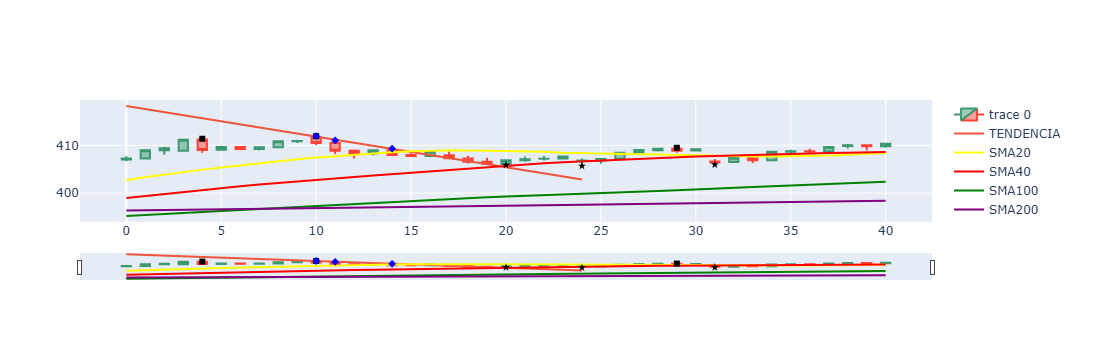

In [135]:
id_caso=7
symbol='SPY'

dfpl = df_h4.query("companyName==@symbol and id_posiblepm40==@id_caso")
#reiniciar index dataframe
dfpl.reset_index(drop=True, inplace=True)
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'])])

#company = df_casos['companyName'][i]
#tupla = dfpl[dfpl["ind_posicion"]==0]
tupla = dfpl.query("ind_posicion==0")
candle = tupla.index[0]
backcandles = 20
window = 0

sl_highs, interc_highs,  r_sq_h = collect_channel(candle, backcandles, window, id_caso)
x = np.array(range(candle-backcandles-window, candle+5))
fig.add_trace(go.Scatter(x=x, y=sl_highs*x + interc_highs, mode='lines', name='TENDENCIA'))


fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl["SMA20"], mode='lines', name='SMA20', line=dict(color="Yellow")))
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl["SMA40"], mode='lines', name='SMA40', line=dict(color="Red")))
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl["SMA100"], mode='lines', name='SMA100', line=dict(color="green")))
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl["SMA200"], mode='lines', name='SMA200', line=dict(color="purple")))
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl["trendhigher"], mode='markers', name='trendhigher', line=dict(color="black"), marker_symbol="square"))
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl["trendlower"], mode='markers', name='trendlower', line=dict(color="black"), marker_symbol="star" ))
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl["ind_high"], mode='markers', name='puntoTendencia', line=dict(color="blue"), marker_symbol="diamond" ))
#fig.add_trace(go.Scatter(df_h3.query("companyName=='AAPL' and id_posiblepm40==1")['datetime'], df_h3.query("companyName=='AAPL' and id_posiblepm40==1")['close_max'], color='red', label = 'Cambio tendencia bajista')
#fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
#plt.plot(df_d2.query("companyName=='AAPL'")['date'], df_d2.query("companyName=='AAPL'")['SMA100'], color='red', label = 'SMA100')
#plt.plot(df_d2.query("companyName=='AAPL'")['date'], df_d2.query("companyName=='AAPL'")['SMA200'], color='green', label = 'SMA200')
fig.show()

In [ ]:
dfpl

In [ ]:
dfTrend = pd.DataFrame(x, columns=["x"])
dfTrend['trend'] = sl_highs*dfTrend['x'] + interc_highs
dfTrend

In [ ]:
#pd.merge(dfpl, dfTrend, left_on="index" ,right_on="index" ,how='left',suffixes=('_left','_right'))
resultprev=dfpl.join(dfTrend)
result=resultprev.drop('x',axis=1)
del resultprev
result

 #merge(dfpl, dfTrend, left_index=True, right_index=True)

In [ ]:
result

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf  # Asegúrate de tener instalada esta librería

# Descargar datos históricos
symbol = 'TSLA'  # Puedes cambiar el símbolo según el activo que estés analizando
data = yf.download(symbol, start='2023-01-01', end='2024-01-01')

# Calcular promedio móvil de 20 y 40
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA40'] = data['Close'].rolling(window=40).mean()

# Determinar tendencia alcista
data['TendenciaAlcista'] = np.where(data['MA20'] > data['MA40'], True, False)

# Identificar punto de quiebre
data['Quiebre'] = np.where(data['Low'] <= data['MA40'], True, False)

# Trasando la línea de tendencia bajista
data['TrendLine'] = data['High'].rolling(window=20).min()

# Señales de compra
data['Compra'] = np.where((data['TendenciaAlcista'] & (data['Close'] > data['TrendLine']) & (data['Close'].shift(1) <= data['TrendLine'].shift(1))), True, False)

# Señales de venta
data['Venta'] = np.where((data['Close'].shift(1) > data['Close']) & (data['Close'].shift(1) > data['Close'].shift(2)), True, False)

# Mostrar el dataframe con las señales
print(data[['Close', 'MA20', 'MA40', 'TendenciaAlcista', 'Quiebre', 'TrendLine', 'Compra', 'Venta']])

In [ ]:
# Cortar el DataFrame desde el índice 10 hasta el índice 20
df_cortado = data.loc['2023-02-01':'2023-03-07']

In [ ]:
df_cortado

In [ ]:
#pd.unique(appl_hor3['id_posiblegpa'])
#specify path for export

import os
   
path = r'C:\Users\carlo\OneDrive\Documentos\TRADER\traderapp\data\pm40_h.txt'

# check whether the file exists
if os.path.exists(path):
    # delete the file
    os.remove(path)
else:
    # if the file does not exist.
    print("File does not exists. File needs to be created.")

#export DataFrame to text file
with open(path, 'a') as f:
    #df_string = appl_hor3.to_string(header=True, index=False, sep ='\t')
    df_h4.to_csv(path, header=True, index=None, sep='\t', mode='w')
    #f.write(df_string)